<a href="https://colab.research.google.com/github/ljh815/2025-1-myclass-BDA/blob/main/13w_A_mon_0609_easy_ch10_text_mining_BTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#13주 BTS 댓글 워드 클라우드

In [62]:
!pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 105.4 MB/s eta 0:00:00


In [63]:
import koreanize_matplotlib

In [1]:
!apt-get install fonts-nanum*

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20200506-1).
fonts-nanum-coding is already the newest version (2.5-3).
fonts-nanum-eco is already the newest version (1.000-7).
fonts-nanum-extra is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [2]:
!find / -name NanumGothic.ttf

/usr/share/fonts/truetype/nanum/NanumGothic.ttf
find: ‘/proc/67/task/67/net’: Invalid argument
find: ‘/proc/67/net’: Invalid argument


In [3]:
FONT_PATH = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"

In [4]:
!pip show wordcloud

Name: wordcloud
Version: 1.9.4
Summary: A little word cloud generator
Home-page: https://github.com/amueller/word_cloud
Author: 
Author-email: Andreas Mueller <t3kcit+wordcloud@gmail.com>
License: MIT License
Location: /usr/local/lib/python3.11/dist-packages
Requires: matplotlib, numpy, pillow
Required-by: 


In [5]:
!pip install konlpy

In [6]:
!pip show konlpy

Name: konlpy
Version: 0.6.0
Summary: Python package for Korean natural language processing.
Home-page: http://konlpy.org
Author: Team KoNLPy
Author-email: konlpy@googlegroups.com
License: GPL v3
Location: /usr/local/lib/python3.11/dist-packages
Requires: JPype1, lxml, numpy
Required-by: 


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [8]:
!git clone https://github.com/ai7dnn/data

fatal: destination path 'data' already exists and is not an empty directory.


In [9]:
df = pd.read_csv("data/news_comment_BTS.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   reg_time  1200 non-null   object
 1   reply     1200 non-null   object
 2   press     1200 non-null   object
 3   title     1200 non-null   object
 4   url       1200 non-null   object
dtypes: object(5)
memory usage: 47.0+ KB


In [10]:
df.sample(5)

,reg_time,reply,press,title,url
475,2020-09-01 11:28:43,"아티스트의 음악성, 대중성보단 팬덤의 화력으로 1등이 된거같음 지금까지 수많은 미국...",뉴시스,BTS '다이너마이트' 빌보드 '핫100' 1위…한국가수 최초,https://news.naver.com/main/read.nhn?mode=LSD&...
447,2020-09-01 19:52:11,올림픽과 아시안게임금메달 병역면제와 비교도안된다 미국이 열광하는 음악 문화에 1등...,뉴시스,BTS '다이너마이트' 빌보드 '핫100' 1위…한국가수 최초,https://news.naver.com/main/read.nhn?mode=LSD&...
971,2020-09-01 03:02:09,너무 자랑스럽다 방탄 ㅠㅠ 보라해<U+0001F49C><U+0001F49C>,경향신문,"BTS, 한국 가수 최초 미 빌보드 싱글차트 1위···‘다이너마이트’급 대기록",https://news.naver.com/main/read.nhn?mode=LSD&...
810,2020-09-01 03:12:53,왜.. 눈물이 나죠. 방탄소년단과 함께 내 청춘도 같이 열심히 사는 중이었다가 코로...,경향신문,"BTS, 한국 가수 최초 미 빌보드 싱글차트 1위···‘다이너마이트’급 대기록",https://news.naver.com/main/read.nhn?mode=LSD&...
699,2020-09-01 04:10:48,빌보드 역사상 진입을 1위로한 3번째 아티스트라네요. 대단한 업적입니다. 축하합니다...,경향신문,"BTS, 한국 가수 최초 미 빌보드 싱글차트 1위···‘다이너마이트’급 대기록",https://news.naver.com/main/read.nhn?mode=LSD&...


In [11]:
df.reply[:]

,reply
0,국보소년단<U+0001F49C>
1,아줌마가 들어도 좋더라
2,팩트체크\n\n현재 빌보드 HOT 100\n\n1위 방탄소년단[BTS]\n2위 C...
3,방탄소년단이 한국사람이라 너무 자랑스러워요 ㅠㅠ 우리오래오래 함께하자!
4,"대단한 BTS, 월드 클래스는 다르네^^ 좋은 소식!! 응원해요"
...,...
1195,역시!!!!!!!!!!!!
1196,우리 탄이들 너무 자랑스럽고\n사랑해<U+0001F49C><U+0001F49C><U...
1197,이런애들 꼭 군대를 보내 는게 맞을까요
1198,군면제급이다 이건


In [12]:
df.reply[:10]

,reply
0,국보소년단<U+0001F49C>
1,아줌마가 들어도 좋더라
2,팩트체크\n\n현재 빌보드 HOT 100\n\n1위 방탄소년단[BTS]\n2위 C...
3,방탄소년단이 한국사람이라 너무 자랑스러워요 ㅠㅠ 우리오래오래 함께하자!
4,"대단한 BTS, 월드 클래스는 다르네^^ 좋은 소식!! 응원해요"
5,정국오빠 생일과 더불어 빌보드 1위기사라니ㅠㅠ축제구나
6,정말 축하하고 응원하지만\n집에서 여러 계정으로 스트리밍 돌리고 사재기하고 다른 팬...
7,"기자는 자고 일어났지만, 팬들은 못자고 발표 기다림"
8,자랑스럽다!!!!!! 축하합니다!!!!
9,SuperM 늘 응원하고 사랑합니다~


In [13]:
df['reply'].str.replace('[^가-힣]', ' ', regex = True)

,reply
0,국보소년단
1,아줌마가 들어도 좋더라
2,팩트체크 현재 빌보드 위 방탄소년단 위 ...
3,방탄소년단이 한국사람이라 너무 자랑스러워요 우리오래오래 함께하자
4,대단한 월드 클래스는 다르네 좋은 소식 응원해요
...,...
1195,역시
1196,우리 탄이들 너무 자랑스럽고 사랑해 ...
1197,이런애들 꼭 군대를 보내 는게 맞을까요
1198,군면제급이다 이건


In [14]:
df['reply'] = df['reply'].str.replace('[^가-힣]', ' ', regex = True)
df['reply'].sample(5)

,reply
366,문죄인의 치적입니다 역시 문죄인
858,결국 해내는구나 와 눈물이 다 나네
333,진짜 정말 노래도 좋고 성적도 중요하지만 이러한 시기에 힘이 되고 싶어서 쉬지 않고...
1187,넘사벽이다 진짜 이런날이 오는구나 이 시국에 좋은 뉴스 좋다
992,너무너무 멋있어서 소름끼쳐


In [15]:
from konlpy.tag import Hannanum
han = Hannanum()
han.nouns(u'질문이나 건의사항은 깃헙 이슈 트래커에 남겨주세요.')

['질문', '건의사항', '깃헙', '이슈', '트래커']

In [16]:
from konlpy.tag import Kkma
kkma = Kkma()
kkma.nouns(u'질문이나 건의사항은 깃헙 이슈 트래커에 남겨주세요.')

['질문', '건의', '건의사항', '사항', '깃헙', '이슈', '트래커']

In [17]:
mydf = pd.DataFrame({'A':[1,2,3], 'b':[4,5,6]})
mydf

,A,b
0,1,4
1,2,5
2,3,6


In [18]:
dfs = mydf.apply(lambda x: x*2)
dfs

,A,b
0,2,8
1,4,10
2,6,12


In [19]:
dfs = mydf.apply(lambda x: x+2)
dfs

,A,b
0,3,6
1,4,7
2,5,8


In [20]:
df['reply'].sample(5)

,reply
606,빌보드 메인싱글 핫 위가 한국 가수가 부른 곡이 되었구나 이런 날도 보네 ...
225,아미인데 자꾸 댓글에 군면제 해달라는 댓글이 있어서 남깁니다 방탄소년단 멤버들...
527,이녀석들 한국어로 부르니까 안되니까 영어로 불렀어 변절자들
1108,이름모를 국제콩쿨에서 대상받으면 면제 손흥민과 같이 축구했다고 벤치앉은 선수들 면제...
572,캬 국뽕소년단 만세다 경사낫네 경사낫어


In [21]:
nouns = df['reply'].apply(kkma.nouns)
nouns

,reply
0,"[국보, 국보소년단, 소년단]"
1,[아줌마]
2,"[팩트, 팩트체크, 체크, 보드, 위, 방탄, 방탄소년단, 소년단]"
3,"[방탄, 방탄소년단, 소년단, 한국, 한국사람, 사람, 자랑, 우리, 하자]"
4,"[월드, 클래스, 소식, 응원]"
...,...
1195,[]
1196,"[우리, 탄, 자랑, 사랑]"
1197,"[애, 군대]"
1198,"[군, 군면제급, 면제, 급]"


In [22]:
nouns = nouns.explode()
nouns

,reply
0,국보
0,국보소년단
0,소년단
1,아줌마
2,팩트
...,...
1199,박지민
1199,김태형
1199,전
1199,전정국


In [23]:
test = pd.DataFrame({'A':[[1,2,3],'foo', [], [3,4]], 'B':1,
                     'C':[['a','b','c'], np.nan, [], ['d','e']]})
test

,A,B,C
0,"[1, 2, 3]",1,"[a, b, c]"
1,foo,1,NaN
2,[],1,[]
3,"[3, 4]",1,"[d, e]"


In [24]:
test.explode('A') #기말 시험 예상

,A,B,C
0,1,1,"[a, b, c]"
0,2,1,"[a, b, c]"
0,3,1,"[a, b, c]"
1,foo,1,NaN
2,NaN,1,[]
3,3,1,"[d, e]"
3,4,1,"[d, e]"


In [25]:
test.explode(['A', 'C']) #기말 시험 예상

,A,B,C
0,1,1,a
0,2,1,b
0,3,1,c
1,foo,1,NaN
2,NaN,1,NaN
3,3,1,d
3,4,1,e


In [26]:
df_word = pd.DataFrame({'word':nouns})
df_word.sample(5)

,word
201,현실
207,카르텔
373,추
931,대한
942,방탄


In [27]:
df_word['len'] =df_word['word'].str.len()
df_word = df_word.query('len >=2')
df_word.sample(5)

,word,len
61,지금,2.0
667,이름,2.0
362,대박,2.0
816,소년단,3.0
372,상금,2.0


In [28]:
df_word.query('word == "소년단"')

,word,len
0,소년단,3.0
2,소년단,3.0
3,소년단,3.0
27,소년단,3.0
29,소년단,3.0
...,...,...
1123,소년단,3.0
1159,소년단,3.0
1162,소년단,3.0
1164,소년단,3.0


In [29]:
df_word = df_word.groupby('word', as_index=False) \
                 .agg(n = ('word', 'count')) \
                 .sort_values('n', ascending=False)
df_word

,word,n
752,방탄,280
1878,축하,236
1556,자랑,205
1032,소년단,144
763,방탄소년단,136
...,...,...
2140,활용,1
2141,황금,1
2142,황금막내,1
2143,회사,1


In [30]:
top20 = df_word.head(20)
top20

,word,n
752,방탄,280
1878,축하,236
1556,자랑,205
1032,소년단,144
763,방탄소년단,136
813,보드,131
618,면제,125
233,군면제,78
225,군대,77
1364,우리,68


<Axes: xlabel='n', ylabel='word'>

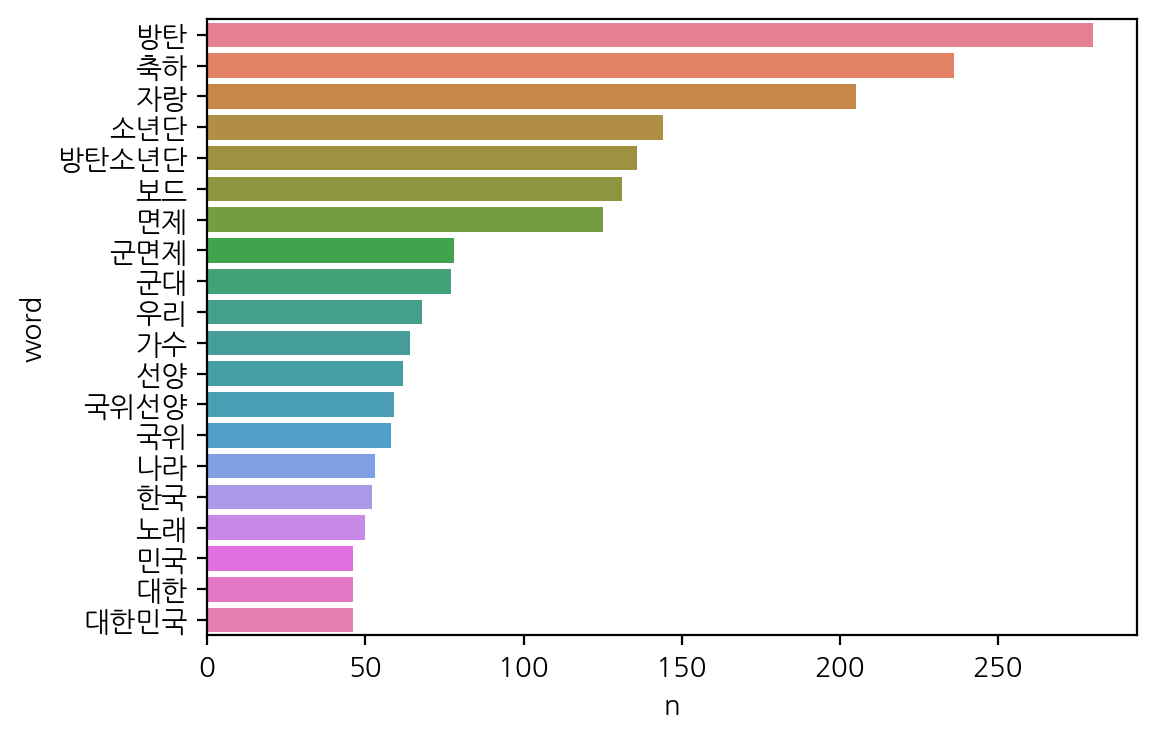

In [64]:
plt.figure(figsize=(6, 4))
sns.barplot(data=top20, y='word', x='n', hue='word')

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
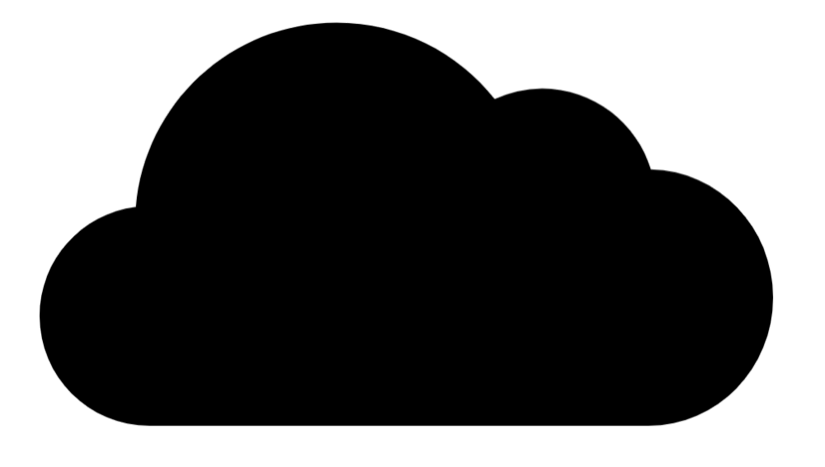

In [32]:
from PIL import Image
icon = Image.open('data/cloud.png')

img = Image.new('RGB', icon.size, (255, 255, 255))
img.paste(icon, icon)

img = np.array(img)
img

In [33]:
df_word.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2168 entries, 752 to 2144
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   word    2168 non-null   object
 1   n       2168 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 50.8+ KB


In [34]:
df_word.sample(5)

,word,n
981,선구자,2
234,군면제급,1
1335,올해,1
1315,예술분야,1
1094,스틴비버,1


In [35]:
dic_word = df_word.set_index('word').to_dict()['n']
dic_word

{'방탄': 280,
 '축하': 236,
 '자랑': 205,
 '소년단': 144,
 '방탄소년단': 136,
 '보드': 131,
 '면제': 125,
 '군면제': 78,
 '군대': 77,
 '우리': 68,
 '가수': 64,
 '선양': 62,
 '국위선양': 59,
 '국위': 58,
 '나라': 53,
 '한국': 52,
 '노래': 50,
 '민국': 46,
 '대한': 46,
 '대한민국': 46,
 '진짜': 43,
 '최고': 40,
 '대박': 39,
 '세계': 36,
 '아미': 35,
 '소식': 31,
 '시기': 30,
 '생각': 30,
 '사람': 29,
 '정국': 29,
 '행복': 29,
 '라니': 29,
 '역사': 28,
 '사랑': 28,
 '코로나': 27,
 '차트': 27,
 '생일': 27,
 '핫백': 26,
 '감사': 24,
 '위라니': 24,
 '우리나라': 23,
 '축하해': 23,
 '미국': 22,
 '이것': 22,
 '전세계': 22,
 '싱글': 22,
 '인정': 22,
 '그룹': 22,
 '진심': 22,
 '정도': 22,
 '노력': 21,
 '응원': 20,
 '활동': 19,
 '음악': 19,
 '요즘': 19,
 '고생': 18,
 '최초': 17,
 '아이': 17,
 '올림픽': 15,
 '너희': 15,
 '문화': 15,
 '이제': 15,
 '국민': 15,
 '때문': 15,
 '국가': 15,
 '뉴스': 15,
 '기사': 14,
 '수고': 14,
 '숟가락': 14,
 '내가': 14,
 '대통령': 14,
 '멤버': 14,
 '기분': 14,
 '시국': 13,
 '아티스트': 13,
 '이름': 13,
 '한국인': 13,
 '눈물': 13,
 '지금': 12,
 '마이트': 12,
 '아시아': 12,
 '금메달': 12,
 '댓글': 12,
 '친구': 11,
 '남자': 11,
 '국뽕': 11,
 '기록': 11,
 '싱글차트': 11,

In [36]:
wc = WordCloud(random_state=1234, font_path=FONT_PATH,
               width = 400, height = 400, background_color='white',
               mask = img)

In [37]:
%config InlineBackend.figure_format = 'retina'

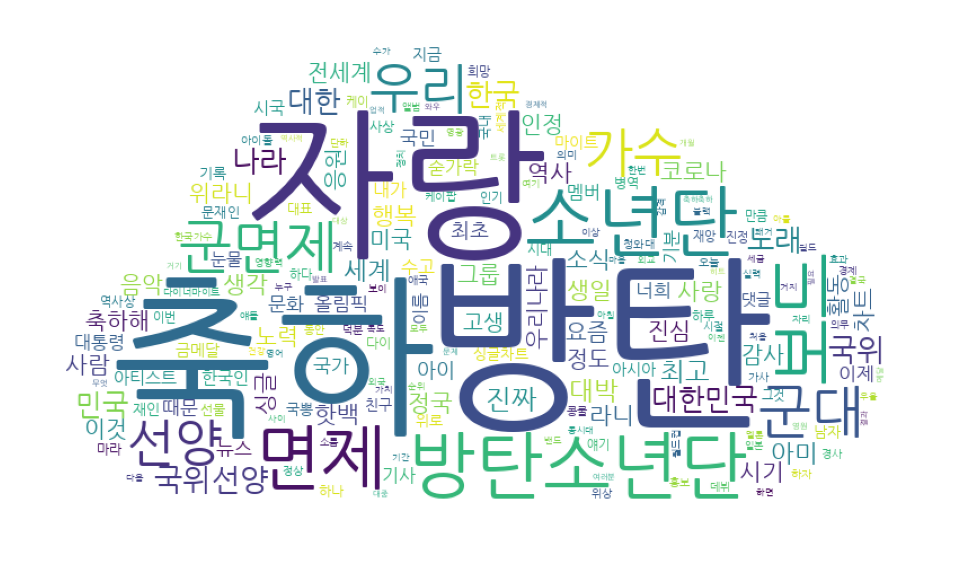

In [38]:
imgWC = wc.generate_from_frequencies(dic_word)
plt.figure(figsize=(6, 4));
plt.axis('off')
plt.imshow(imgWC);

# 기말고사 예상

In [39]:
import pandas as pd

df = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [10, 20, 30]
})
df

,A,B
0,1,10
1,2,20
2,3,30


In [40]:
# 각 열의 최대값에서 최소값을 뺀 결과
print(df.apply(lambda x: x.max() - x.min(), axis=0))

A     2
B    20
dtype: int64


In [41]:
# 각 열의 최대값에서 최소값을 뺀 결과
print(df.apply(lambda x: x.max() - x.min()))

A     2
B    20
dtype: int64


In [42]:
# 각 열의 최대값에서 최소값을 뺀 결과
print(df.apply(lambda x: x.max() - x.min(), axis=1))

0     9
1    18
2    27
dtype: int64


In [43]:
df

,A,B
0,1,10
1,2,20
2,3,30


In [44]:
f = lambda x: x + 5
df.apply(f)

,A,B
0,6,15
1,7,25
2,8,35


In [45]:
f = lambda x: x * 5
df.apply(f, axis=1)

,A,B
0,5,50
1,10,100
2,15,150


In [46]:
f = lambda x: x / 5
df.apply(f, axis=1)

,A,B
0,0.2,2.0
1,0.4,4.0
2,0.6,6.0


In [47]:
# 각 행의 평균 구하기
print(df.apply(lambda x: x.mean(), axis=1))

0     5.5
1    11.0
2    16.5
dtype: float64


In [48]:
# 각 열의 평균 구하기
print(df.apply(lambda x: x.mean(), axis=0))


A     2.0
B    20.0
dtype: float64


In [49]:
df

,A,B
0,1,10
1,2,20
2,3,30


In [50]:
df.apply(lambda x: x.sum(), axis=0)

,0
A,6
B,60


In [51]:
df.apply(sum, axis=0)

,0
A,6
B,60


In [52]:
df.apply(sum, axis=1)

,0
0,11
1,22
2,33


In [53]:
df.sum(axis=0)

,0
A,6
B,60


In [54]:
df.sum(axis=1)

,0
0,11
1,22
2,33


In [55]:
import pandas as pd

df = pd.DataFrame({
    'name': ['Alice', 'Bob'],
    'hobbies': [['reading', 'cooking'], ['gaming']]
})
df

,name,hobbies
0,Alice,"[reading, cooking]"
1,Bob,[gaming]


In [56]:
# explode 적용
df_exploded = df.explode('hobbies')
df_exploded


,name,hobbies
0,Alice,reading
0,Alice,cooking
1,Bob,gaming


In [57]:
from IPython.display import display_html
def display_side_by_side(*args):
    """여러 데이터프레임 비교가 쉽게 옆쪽으로 표시한다"""
    html_str=''
    for df in args:
        html_str += df.to_html() + '&nbsp;'*4
    display_html(html_str.replace('table','table style="display:inline"'), raw=True)

In [58]:
# 여러 열을 동시에 explode (Pandas 1.3.0 이상)
df = pd.DataFrame({
    'A': [[1, 2], [3]],
    'B': [['a', 'b'], ['c']]
})
df

,A,B
0,"[1, 2]","[a, b]"
1,[3],[c]


In [59]:
display_side_by_side(df, df.explode(['A']))

,A,B
0,"[1, 2]","[a, b]"
1,[3],[c]
,A,B
0,1,"[a, b]"
0,2,"[a, b]"
1,3,[c]


In [60]:
display_side_by_side(df, df.explode(['B']))

,A,B
0,"[1, 2]","[a, b]"
1,[3],[c]
,A,B
0,"[1, 2]",a
0,"[1, 2]",b
1,[3],c


In [61]:
display_side_by_side(df, df.explode(['A', 'B']))

,A,B
0,"[1, 2]","[a, b]"
1,[3],[c]
,A,B
0,1,a
0,2,b
1,3,c
